In [ ]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 4.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/datafess.csv')

Data Selection

In [ ]:
dataset.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,date,time,hour,day
0,1.951270e+18,2025-08-01 13:19:19,0,@deepiener @UNDIP_FESS mjb ka itu dikenain bia...,1.951272e+18,NaN,deepiener,in,NaN,0,1,0,https://x.com/undefined/status/195127152800970...,1.377167e+18,ui_fess,01/08/2025,13:19,13,Friday
1,1.950883e+18,2025-07-31 11:55:01,0,@merch_fess Oren soalnya ada diskon ongkir tin...,1.950888e+18,NaN,merch_fess,in,NaN,0,0,0,https://x.com/undefined/status/195088792415490...,1.872643e+18,ui_fess,31/07/2025,11:55,11,Thursday
2,1.950866e+18,2025-07-31 10:33:09,10,@roblox_fess nder itu rambu dilarang baper sam...,1.950867e+18,NaN,roblox_fess,in,NaN,0,0,0,https://x.com/undefined/status/195086731982943...,3.253775e+09,ui_fess,31/07/2025,10:33,10,Thursday
3,1.950847e+18,2025-07-31 10:28:49,1,@GO_fess worth it aku lolos polban temenku lol...,1.950866e+18,NaN,GO_fess,in,NaN,0,0,0,https://x.com/undefined/status/195086623118530...,1.102124e+18,ui_fess,31/07/2025,10:28,10,Thursday
4,1.950544e+18,2025-07-31 06:44:57,0,@b2planet_fess Junseo cocoknya di fkg ui,1.950810e+18,NaN,b2planet_fess,in,NaN,0,0,0,https://x.com/undefined/status/195080989183830...,1.939508e+18,ui_fess,31/07/2025,06:44,6,Thursday


In [ ]:
tweets = dataset.drop(columns=['conversation_id_str','created_at','id_str','in_reply_to_screen_name','lang','location','tweet_url','user_id_str'])

In [ ]:
tweets.head()

,favorite_count,full_text,image_url,quote_count,reply_count,retweet_count,username,date,time,hour,day
0,0,@deepiener @UNDIP_FESS mjb ka itu dikenain bia...,NaN,0,1,0,ui_fess,01/08/2025,13:19,13,Friday
1,0,@merch_fess Oren soalnya ada diskon ongkir tin...,NaN,0,0,0,ui_fess,31/07/2025,11:55,11,Thursday
2,10,@roblox_fess nder itu rambu dilarang baper sam...,NaN,0,0,0,ui_fess,31/07/2025,10:33,10,Thursday
3,1,@GO_fess worth it aku lolos polban temenku lol...,NaN,0,0,0,ui_fess,31/07/2025,10:28,10,Thursday
4,0,@b2planet_fess Junseo cocoknya di fkg ui,NaN,0,0,0,ui_fess,31/07/2025,06:44,6,Thursday


Data Cleaning

In [ ]:
tweets.drop_duplicates()

,favorite_count,full_text,image_url,quote_count,reply_count,retweet_count,username,date,time,hour,day
0,0,@deepiener @UNDIP_FESS mjb ka itu dikenain bia...,NaN,0,1,0,ui_fess,01/08/2025,13:19,13,Friday
1,0,@merch_fess Oren soalnya ada diskon ongkir tin...,NaN,0,0,0,ui_fess,31/07/2025,11:55,11,Thursday
2,10,@roblox_fess nder itu rambu dilarang baper sam...,NaN,0,0,0,ui_fess,31/07/2025,10:33,10,Thursday
3,1,@GO_fess worth it aku lolos polban temenku lol...,NaN,0,0,0,ui_fess,31/07/2025,10:28,10,Thursday
4,0,@b2planet_fess Junseo cocoknya di fkg ui,NaN,0,0,0,ui_fess,31/07/2025,06:44,6,Thursday
...,...,...,...,...,...,...,...,...,...,...,...
2007,2,halo ges! numpang nanya dong kalender tahunan ...,NaN,0,2,0,sunibfess,27/07/2025 02:07,02:07,2,Sunday
2008,0,@sunib_fess biasanya kampus agama punya organi...,NaN,0,0,0,sunibfess,26/07/2025 22:26,22:26,22,Saturday
2009,0,@sunib_fess Benar sekali sekarang Binus kampus...,NaN,0,1,0,sunibfess,26/07/2025 22:11,22:11,22,Saturday
2010,0,@sunib_fess binus mn ni,NaN,0,0,0,sunibfess,26/07/2025 18:32,18:32,18,Saturday


In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   favorite_count  2013 non-null   int64 
 1   full_text       2013 non-null   object
 2   image_url       130 non-null    object
 3   quote_count     2013 non-null   int64 
 4   reply_count     2013 non-null   int64 
 5   retweet_count   2013 non-null   int64 
 6   username        2013 non-null   object
 7   date            2013 non-null   object
 8   time            2013 non-null   object
 9   hour            2013 non-null   int64 
 10  day             2013 non-null   object
dtypes: int64(5), object(6)
memory usage: 173.1+ KB


In [ ]:
# Categorical columns
cat_df = [col for col in tweets.columns if tweets[col].dtype == 'object']
print('Categorical columns :',cat_df)
# Numerical columns
num_df = [col for col in tweets.columns if tweets[col].dtype != 'object']
print('Numerical columns :',num_df)

Categorical columns : ['full_text', 'image_url', 'username', 'date', 'time', 'day']
Numerical columns : ['favorite_count', 'quote_count', 'reply_count', 'retweet_count', 'hour']


In [ ]:
tweets[cat_df].nunique()

,0
full_text,2003
image_url,129
username,4
date,669
time,948
day,7


Data Visualization

In [ ]:
print(tweets['username'].value_counts())

username
sunibfess     515
ubsansfess    512
UGM_FESS      509
ui_fess       477
Name: count, dtype: int64


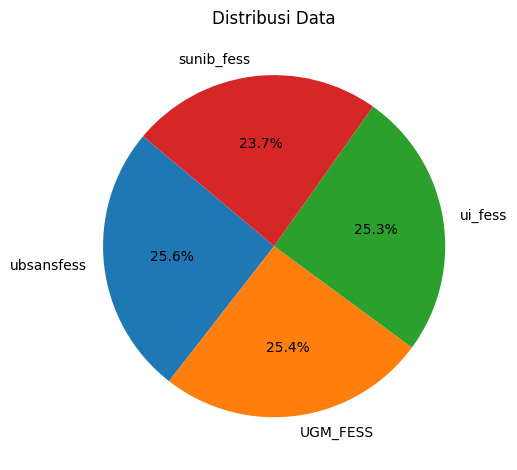

In [ ]:
import matplotlib.pyplot as plt

univ_fess = ["ubsansfess", "UGM_FESS", "ui_fess","sunib_fess"]
tweet_counts = tweets['username'].value_counts()

fig, axes = plt.subplots()

axes.pie(tweet_counts, labels=univ_fess, autopct='%1.1f%%', startangle=140)
axes.set_title("Distribusi Data")

plt.tight_layout()
plt.show()

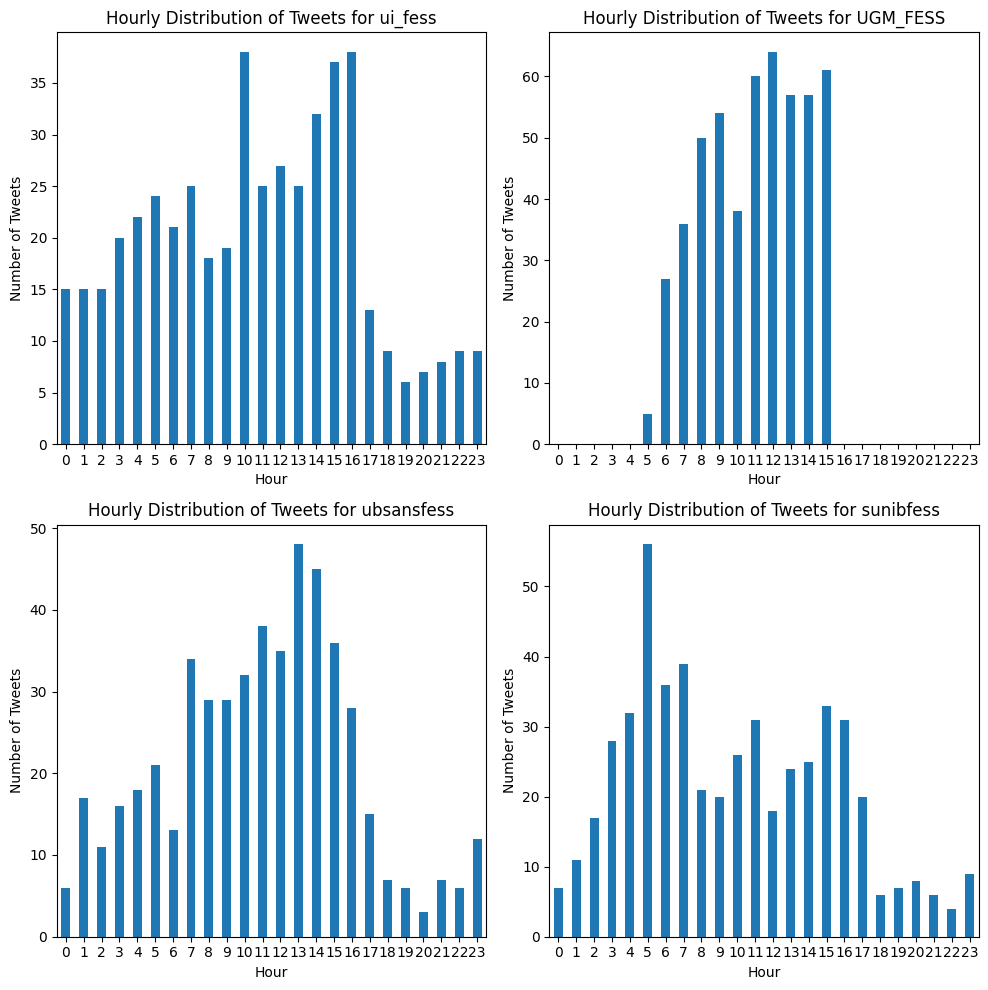

In [ ]:
import matplotlib.pyplot as plt

hourly_counts = tweets.groupby(['username', 'hour']).size().unstack(fill_value=0)
univ_fess = tweets['username'].unique()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for i, username in enumerate(univ_fess):
    hourly_counts.loc[username].plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Hourly Distribution of Tweets for {username}')
    axes[i].set_xlabel('Hour')
    axes[i].set_ylabel('Number of Tweets')
    axes[i].tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

Model

In [ ]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata
api_token = userdata.get('REPLICATE_API_TOKEN')
os.environ["REPLICATE_API_TOKEN"] = api_token
model = "ibm-granite/granite-3.3-8b-instruct"



output = Replicate(
    model=model,
    replicate_api_token=api_token,
)

In [ ]:
sentiments = []
categories = []

prompt_template = """
Classify the sentiment of the following tweets as Positive, Negative, Neutral, or Mixed, and identify the main topic category for each tweet.
When identifying the topic, please note that ui(Universitas Indonesia) and ui(user interface) are different".
Respond in the following format for each tweet:
Tweet [number]: Sentiment: [Sentiment] Category: [Category]

Tweets:
{tweets_text}
"""

batch_size = 50
for i in range(0, len(tweets), batch_size):
    batch_tweets = tweets['full_text'][i:i+batch_size]
    tweets_text = "\n".join([f"Tweet {j+1}: {tweet}" for j, tweet in enumerate(batch_tweets)])
    prompt = prompt_template.format(tweets_text=tweets_text)

    try:
        response = output.invoke(prompt)

        if i == 0:
            print("--- Model Response for First Batch ---")
            print(response)
            print("------------------------------------")

        lines = response.strip().split('\n')
        batch_sentiments = ["Unknown"] * len(batch_tweets)
        batch_categories = ["Unknown"] * len(batch_tweets)

        for line in lines:
            if line.startswith("Tweet"):
                try:
                    parts = line.split(":")
                    tweet_number = int(parts[0].replace("Tweet", "").strip()) - 1
                    if 0 <= tweet_number < len(batch_tweets):
                        sentiment_category_parts = ":".join(parts[1:]).split("Category:")
                        sentiment = sentiment_category_parts[0].replace("Sentiment:", "").strip() if len(sentiment_category_parts) > 0 else "Unknown"
                        category = sentiment_category_parts[1].strip() if len(sentiment_category_parts) > 1 else "Unknown"
                        batch_sentiments[tweet_number] = sentiment
                        batch_categories[tweet_number] = category
                except (ValueError, IndexError):
                    pass

        sentiments.extend(batch_sentiments)
        categories.extend(batch_categories)

    except Exception as e:
        print(f"Error processing batch {i//batch_size}: {e}")
        sentiments.extend(["Unknown"] * len(batch_tweets))
        categories.extend(["Unknown"] * len(batch_tweets))


tweets['sentiment'] = sentiments
tweets['category'] = categories



--- Model Response for First Batch ---
Tweet 1: Sentiment: Neutral Category: University application/admission
Tweet 2: Sentiment: Negative Category: User Interface (UI) design critique
Tweet 3: Sentiment: Neutral Category: User Interface (UI)/User Experience (UX) design discussion
Tweet 4: Sentiment: Positive Category: Achievement/Admission to Polban (Institut Teknologi Bandung)
Tweet 5: Sentiment: Neutral Category: University transfer/admission
Tweet 6: Sentiment: Negative Category: User Interface (UI)/User Experience (UX) design critique
Tweet 7: Sentiment: Neutral Category: Passive income investment
Tweet 8: Sentiment: Neutral Category: Sharing design resources
Tweet 9: Sentiment: Neutral Category: Announcing a competition (poster, photography, design)
Tweet 10-20: Sentiment: Neutral Category: Food promotion/advertisement (fresh brownies) near Universitas Indonesia (UI) and Universitas Negeri Semarang (UNESA) campuses
Tweet 21: Sentiment: Neutral Category: Food promotion/advertiseme

In [ ]:
display(tweets.head())

,favorite_count,full_text,image_url,quote_count,reply_count,retweet_count,username,date,time,hour,day,sentiment,category
0,0,@deepiener @UNDIP_FESS mjb ka itu dikenain bia...,NaN,0,1,0,ui_fess,01/08/2025,13:19,13,Friday,Neutral,University application/admission
1,0,@merch_fess Oren soalnya ada diskon ongkir tin...,NaN,0,0,0,ui_fess,31/07/2025,11:55,11,Thursday,Negative,User Interface (UI) design critique
2,10,@roblox_fess nder itu rambu dilarang baper sam...,NaN,0,0,0,ui_fess,31/07/2025,10:33,10,Thursday,Neutral,User Interface (UI)/User Experience (UX) desig...
3,1,@GO_fess worth it aku lolos polban temenku lol...,NaN,0,0,0,ui_fess,31/07/2025,10:28,10,Thursday,Positive,Achievement/Admission to Polban (Institut Tekn...
4,0,@b2planet_fess Junseo cocoknya di fkg ui,NaN,0,0,0,ui_fess,31/07/2025,06:44,6,Thursday,Neutral,University transfer/admission


In [ ]:
display(tweets['category'].value_counts())

,count
category,
Unknown,1010
Academic Inquiry,36
Inquiry/Request,15
Inquiry,10
Inquiry/Request for Information,7
...,...
Unclear context (sebat dluu),1
Unclear context (aku ada nder),1
Offering to share (cerita my dm is open),1


In [ ]:
hate_speech_classification = []

prompt_template_hate = """
Classify the following tweets as "hate tweet", "mixed", or "not hate".
Respond in the following format for each tweet:
Tweet [number]: Classification: [Classification]

Tweets:
{tweets_text}
"""

batch_size = 50

for i in range(0, len(tweets), batch_size):
    batch_tweets = tweets['full_text'][i:i+batch_size]
    tweets_text = "\n".join([f"Tweet {j+1}: {tweet}" for j, tweet in enumerate(batch_tweets)])
    prompt = prompt_template_hate.format(tweets_text=tweets_text)

    try:
        response = output.invoke(prompt)

        if i == 0:
            print("--- Model Response for First Batch ---")
            print(response)
            print("------------------------------------")


        lines = response.strip().split('\n')
        batch_classifications = ["Unknown"] * len(batch_tweets)

        for line in lines:
            if line.startswith("Tweet"):
                try:
                    parts = line.split("Classification:")
                    if len(parts) > 1:
                        tweet_part = parts[0].replace("Tweet", "").strip()
                        classification_part = parts[1].strip()
                        tweet_number = int(tweet_part) - 1

                        if 0 <= tweet_number < len(batch_tweets):
                            batch_classifications[tweet_number] = classification_part
                    else:
                         parts = line.split(":")
                         if len(parts) > 1:
                             tweet_part = parts[0].replace("Tweet", "").strip()
                             classification_part = ":".join(parts[1:]).strip()
                             tweet_number = int(tweet_part) - 1
                             if 0 <= tweet_number < len(batch_tweets):
                                 batch_classifications[tweet_number] = classification_part


                except (ValueError, IndexError):
                    pass

        hate_speech_classification.extend(batch_classifications)

    except Exception as e:
        print(f"Error processing batch {i//batch_size} for hate speech classification: {e}")
        hate_speech_classification.extend(["Unknown"] * len(batch_tweets))

tweets['hate_speech_classification'] = hate_speech_classification

display(tweets.head())

--- Model Response for First Batch ---
Tweet 1: Classification: not hate
Tweet 2: Classification: not hate
Tweet 3: Classification: not hate
Tweet 4: Classification: not hate
Tweet 5: Classification: not hate
Tweet 6: Classification: not hate
Tweet 7: Classification: not hate
Tweet 8: Classification: not hate
Tweet 9: Classification: not hate
Tweet 10: Classification: not hate
Tweet 11: Classification: not hate
Tweet 12: Classification: not hate
Tweet 13: Classification: not hate
Tweet 14: Classification: mixed (discusses UI/UX competition, no clear hate speech)
Tweet 15: Classification: not hate
Tweet 16: Classification: mixed (expresses dissatisfaction with UI, no clear hate speech)
Tweet 17: Classification: not hate
Tweet 18: Classification: mixed (expresses frustration with UI, no clear hate speech)
Tweet 19: Classification: not hate
Tweet 20: Classification: not hate
Tweet 21: Classification: not hate
Tweet 22: Classification: not hate
Tweet 23: Classification: not hate
Tweet 24: 

,favorite_count,full_text,image_url,quote_count,reply_count,retweet_count,username,date,time,hour,day,sentiment,category,hate_speech_classification
0,0,@deepiener @UNDIP_FESS mjb ka itu dikenain bia...,NaN,0,1,0,ui_fess,01/08/2025,13:19,13,Friday,Neutral,University application/admission,Unknown
1,0,@merch_fess Oren soalnya ada diskon ongkir tin...,NaN,0,0,0,ui_fess,31/07/2025,11:55,11,Thursday,Negative,User Interface (UI) design critique,Unknown
2,10,@roblox_fess nder itu rambu dilarang baper sam...,NaN,0,0,0,ui_fess,31/07/2025,10:33,10,Thursday,Neutral,User Interface (UI)/User Experience (UX) desig...,Unknown
3,1,@GO_fess worth it aku lolos polban temenku lol...,NaN,0,0,0,ui_fess,31/07/2025,10:28,10,Thursday,Positive,Achievement/Admission to Polban (Institut Tekn...,Unknown
4,0,@b2planet_fess Junseo cocoknya di fkg ui,NaN,0,0,0,ui_fess,31/07/2025,06:44,6,Thursday,Neutral,University transfer/admission,Unknown


In [ ]:
print(tweets['hate_speech_classification'].value_counts())

hate_speech_classification
Unknown                                                                                                                                                         1608
not hate                                                                                                                                                         242
Not hate                                                                                                                                                         143
                                                                                                                                                                   3
Classification                                                                                                                                                     3
Mixed                                                                                                                                               

In [ ]:
def simplify_hate_speech_classification(classification):
    """Simplifies hate speech classification into main categories."""
    if isinstance(classification, str):
        lower_classification = classification.lower()
        if "hate tweet" in lower_classification or "hate" in lower_classification and "not hate" not in lower_classification:
            return "Hate"
        elif "not hate" in lower_classification:
            return "Not hate"
        elif "mixed" in lower_classification:
            return "Mixed"
    return "Unknown"

tweets['hate_speech_classification'] = tweets['hate_speech_classification'].apply(simplify_hate_speech_classification)

display(tweets['hate_speech_classification'].value_counts())

,count
hate_speech_classification,
Unknown,1614
Not hate,385
Hate,8
Mixed,6


In [ ]:
print(tweets["category"].value_counts())

category
Unknown                                     1010
Academic Inquiry                              36
Inquiry/Request                               15
Inquiry                                       10
Inquiry/Request for Information                7
                                            ... 
Unclear context (sebat dluu)                   1
Unclear context (aku ada nder)                 1
Offering to share (cerita my dm is open)       1
Unclear context (buat besok2 bisa gakk)        1
Encouragement (Yukk)                           1
Name: count, Length: 817, dtype: int64


In [ ]:
print(tweets["sentiment"].value_counts())

sentiment
Unknown                992
Neutral                599
Negative               201
Positive               166
Mixed                   27
                        10
Neutral/Comparison       4
Neutral/Inquiry          2
Sent                     2
Neutral Category         2
Ne                       2
Encouraging              2
Neutral/Positive         1
Neutral/Descriptive      1
Surprise                 1
Negative Category        1
Name: count, dtype: int64


Result

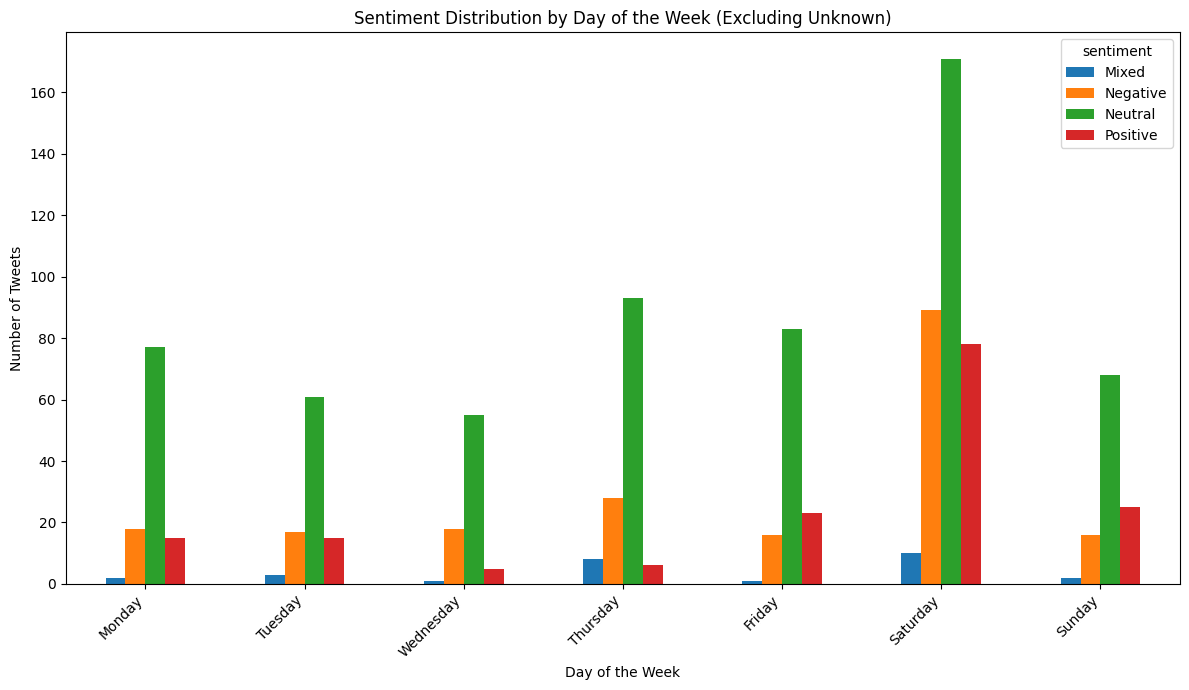

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_tweets = tweets[tweets['sentiment'] != 'Unknown'].copy()

sentiment_by_day = filtered_tweets.groupby(['day', 'sentiment']).size().unstack(fill_value=0)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sentiment_by_day = sentiment_by_day.reindex(day_order)

sentiment_by_day.plot(kind='bar', figsize=(12, 7))

plt.title('Sentiment Distribution by Day of the Week (Excluding Unknown)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

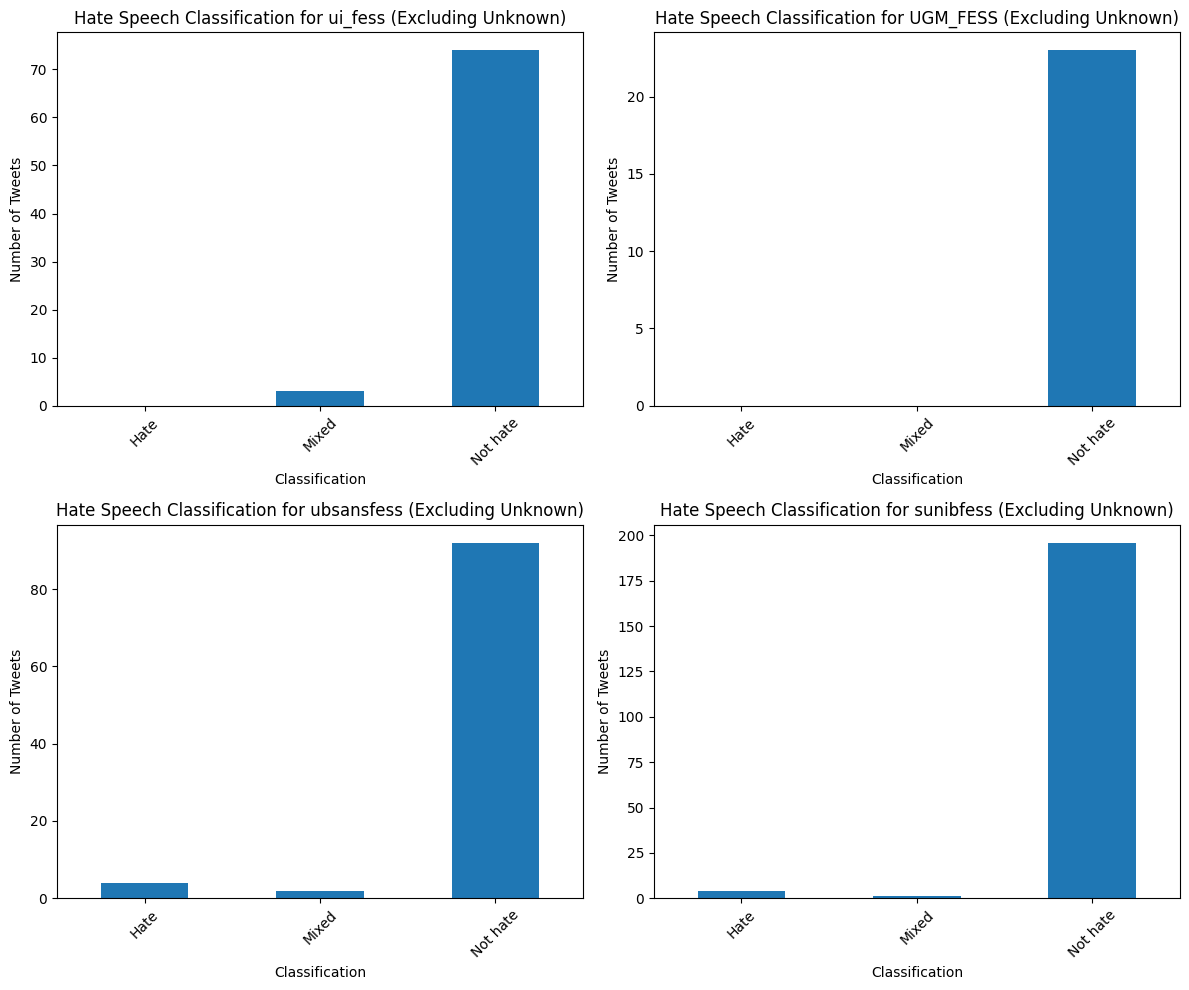

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_tweets_hate = tweets[tweets['hate_speech_classification'] != 'Unknown'].copy()

hate_speech_by_username = filtered_tweets_hate.groupby(['username', 'hate_speech_classification']).size().unstack(fill_value=0)

usernames = tweets['username'].unique()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, username in enumerate(usernames):
    if username in hate_speech_by_username.index:
        hate_speech_by_username.loc[username].plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Hate Speech Classification for {username} (Excluding Unknown)')
        axes[i].set_xlabel('Classification')
        axes[i].set_ylabel('Number of Tweets')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

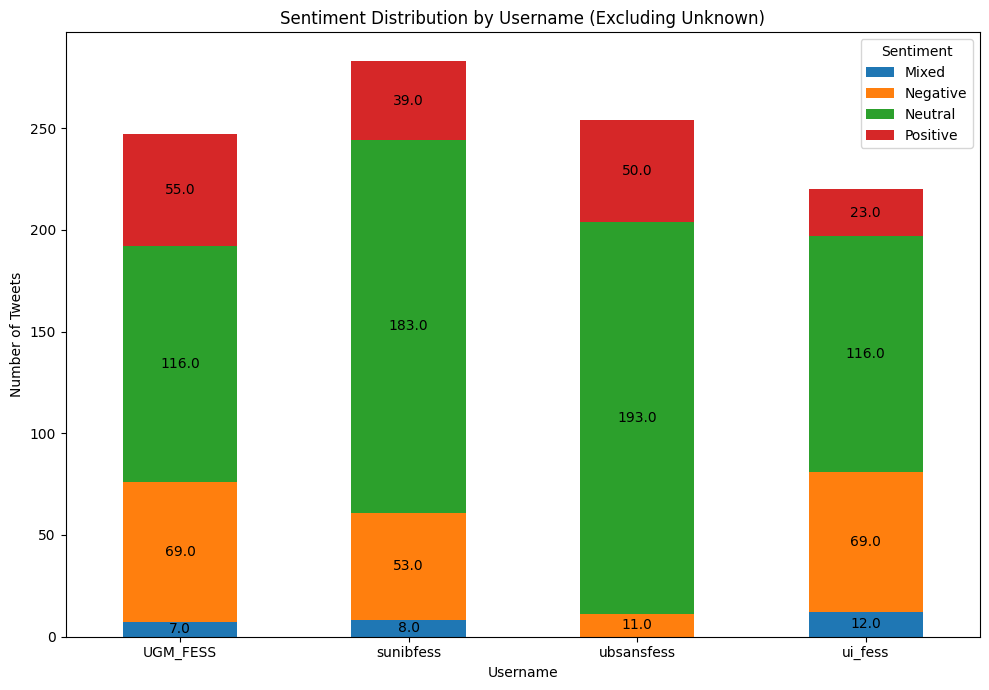

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_tweets_sentiment = tweets[tweets['sentiment'] != 'Unknown'].copy()

sentiment_by_username = filtered_tweets_sentiment.groupby(['username', 'sentiment']).size().unstack(fill_value=0)

ax = sentiment_by_username.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Sentiment Distribution by Username (Excluding Unknown)')
plt.xlabel('Username')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.tight_layout()

for container in ax.containers:
    labels = [f'{w}' if (w := v.get_height()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center')

plt.show()

/tmp/ipython-input-1181652077.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


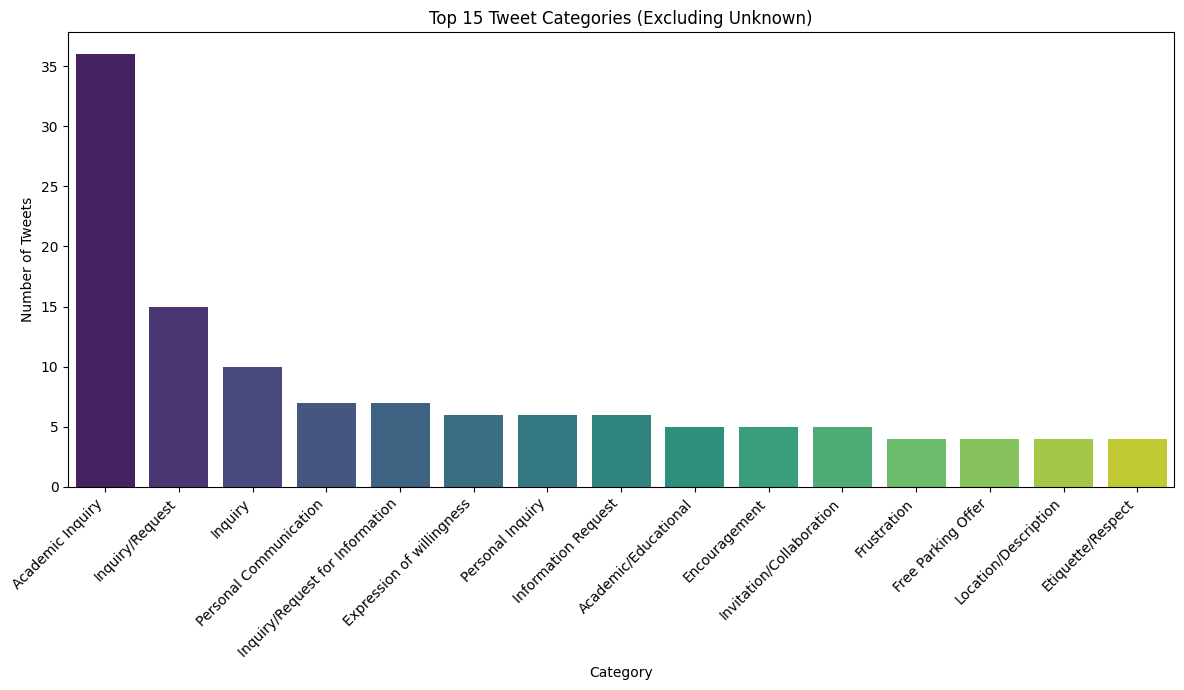

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
top_categories = tweets[tweets['category'] != 'Unknown']['category'].value_counts().nlargest(15)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')

plt.title('Top 15 Tweet Categories (Excluding Unknown)')
plt.xlabel('Category')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

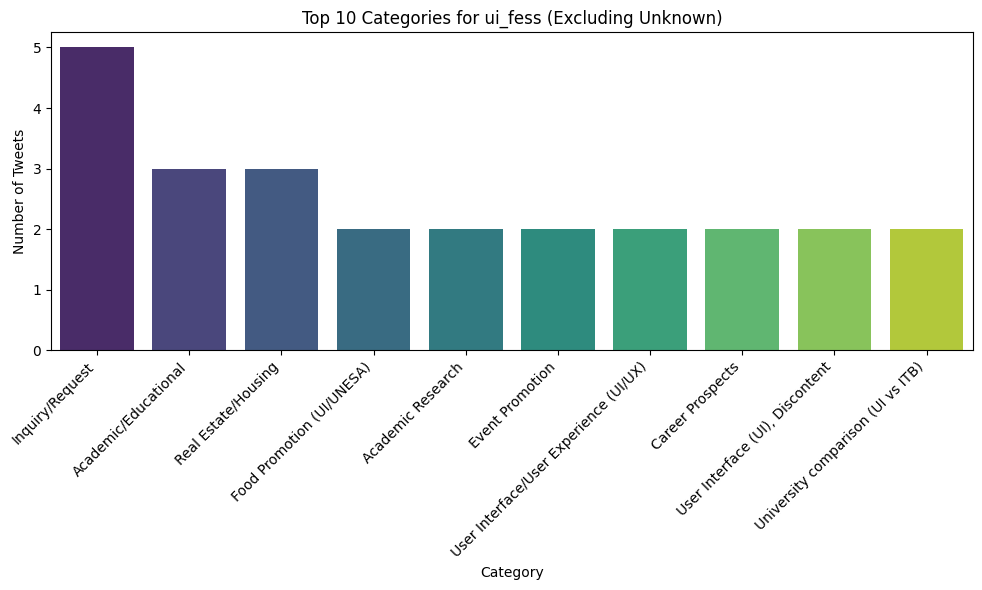

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ui_fess_tweets_filtered = tweets[(tweets['username'] == 'ui_fess') & (tweets['category'] != 'Unknown')].copy()
top_categories_ui_fess = ui_fess_tweets_filtered['category'].value_counts().nlargest(10)

top_categories_ui_fess.index = top_categories_ui_fess.index.str.replace(
    'Food promotion/advertisement (fresh brownies) near Universitas Indonesia (UI) and Universitas Negeri Semarang (UNESA) campuses',
    'Food Promotion (UI/UNESA)'
)

ui_fess_tweets_filtered['category_short'] = ui_fess_tweets_filtered['category'].apply(
    lambda x: 'Food Promotion (UI/UNESA)' if x == 'Food promotion/advertisement (fresh brownies) near Universitas Indonesia (UI) and Universitas Negeri Semarang (UNESA) campuses' else x
)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories_ui_fess.index, y=top_categories_ui_fess.values, palette='viridis', hue=top_categories_ui_fess.index, legend=False)

plt.title('Top 10 Categories for ui_fess (Excluding Unknown)')
plt.xlabel('Category')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

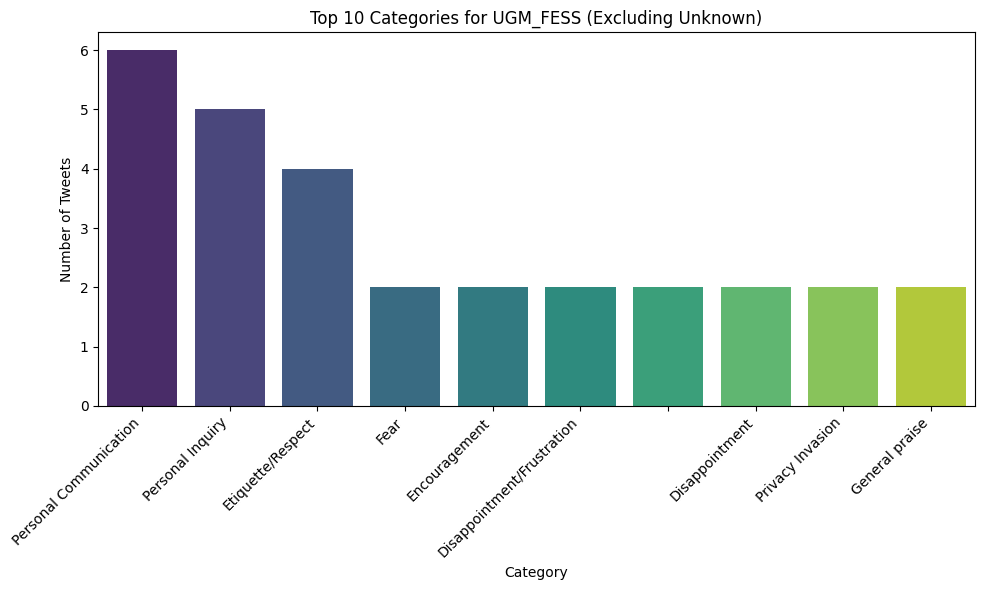

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ugm_fess_tweets_filtered = tweets[(tweets['username'] == 'UGM_FESS') & (tweets['category'] != 'Unknown')].copy()

top_categories_ugm_fess = ugm_fess_tweets_filtered['category'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories_ugm_fess.index, y=top_categories_ugm_fess.values, palette='viridis', hue=top_categories_ugm_fess.index, legend=False)

plt.title('Top 10 Categories for UGM_FESS (Excluding Unknown)')
plt.xlabel('Category')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

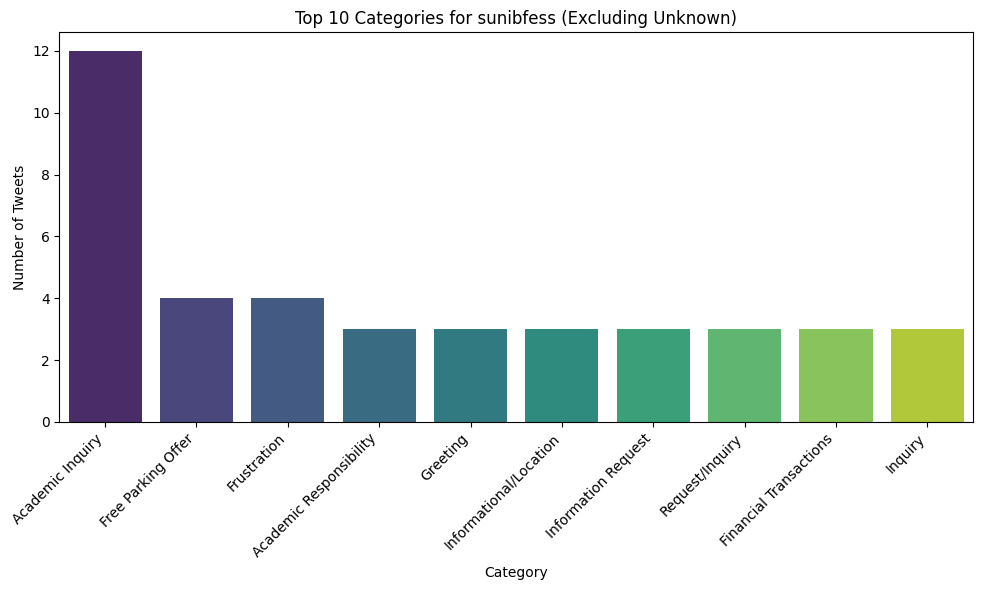

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sunibfess_tweets_filtered = tweets[(tweets['username'] == 'sunibfess') & (tweets['category'] != 'Unknown')].copy()

top_categories_sunibfess = sunibfess_tweets_filtered['category'].value_counts().nlargest(10)

top_categories_sunibfess.index = top_categories_sunibfess.index.str.replace(
    'Request/Inquiry (Request for action without clear sentiment)',
    'Request/Inquiry'
)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories_sunibfess.index, y=top_categories_sunibfess.values, palette='viridis', hue=top_categories_sunibfess.index, legend=False)

plt.title('Top 10 Categories for sunibfess (Excluding Unknown)')
plt.xlabel('Category')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

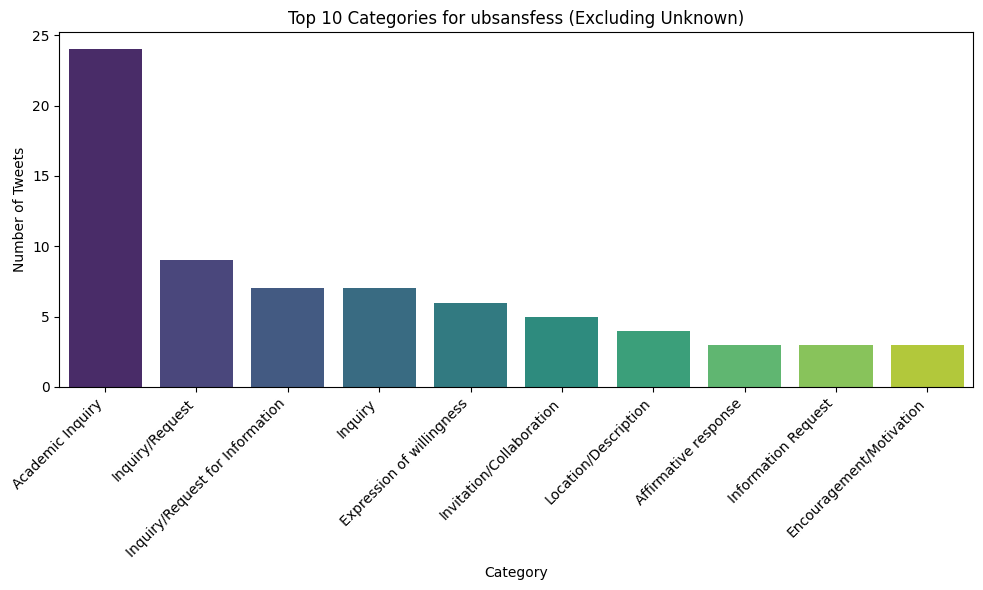

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ubsansfess_tweets_filtered = tweets[(tweets['username'] == 'ubsansfess') & (tweets['category'] != 'Unknown')].copy()

top_categories_ubsansfess = ubsansfess_tweets_filtered['category'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories_ubsansfess.index, y=top_categories_ubsansfess.values, palette='viridis', hue=top_categories_ubsansfess.index, legend=False)

plt.title('Top 10 Categories for ubsansfess (Excluding Unknown)')
plt.xlabel('Category')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
The error `FileNotFoundError: [Errno 2] No such file or directory: '/content/datafess.csv'` indicates that the dataset file is not found at the specified path. I need to ensure the file path is correct. Since the file was loaded successfully in previous steps, it's likely a temporary issue with the environment or the file path needs to be confirmed. Assuming the file is still in the `/content/` directory, I will regenerate the code block including the necessary imports, data loading, cleaning, analysis, and summary steps again.

